# Experiment 2 

- Fine-tuning of the pre-trained TAPE model in a progressively specialized manner while extending the frozen layers
- Performance evaluation using two external datasets, Shomuradova and ImmuneCODE datatsets, which contain SARS-CoV-2 S-protein <sub>269~-277</sub>(YLQPRTFLL) epitope-specific TCR CDR3βs 

## Training process and model architecture


<img src='res/fig1.png' width='70%'>

Training process for the proposed model. The initial model is cloned from pre-trained Tasks Assessing Protein Embeddings (TAPE) model, adding a classification layer at the end. The pre-trained model is fine-tuned in two rounds in a progressively specialized manner while extending the frozen layers between rounds.

<img src='res/fig2.png' width='30%'>

The proposed model architecture. Input amino acid sequences concatenated by epitope and CDR3β sequences are first encoded into tokens using a tokenizer. Each token is then embedded into a 768-dimensional vector in the pre-trained Tasks Assessing Protein Embeddings (TAPE) model which has 12 encoding layers with 12 self-attention heads in each layer. The final classifier, a 2-layer feed forward network, is then used to predict either binder or not from the output of the TAPE model.

## Global configurations

In [1]:
import logging
import logging.config
import os
import sys
import warnings
from enum import auto
import pandas as pd
import numpy as np
from IPython.core.display import display

rootdir = '/home/hym/trunk/TCRBert'
workdir = '%s/notebook' % rootdir
datadir = '%s/data' % rootdir
srcdir = '%s/tcrbert' % rootdir
outdir = '%s/output' % rootdir

os.chdir(workdir)

sys.path.append(rootdir)
sys.path.append(srcdir)

from tcrbert.exp import Experiment
from tcrbert.predlistener import PredResultRecoder


# Display
pd.set_option('display.max.rows', 2000)
pd.set_option('display.max.columns', 2000)

# Logger
warnings.filterwarnings('ignore')
logging.config.fileConfig('../config/logging.conf')
logger = logging.getLogger('tcrbert')
logger.setLevel(logging.INFO)

# Target experiment
exp_key = 'exp2'
experiment = Experiment.from_key(exp_key, reload=True)

exp_conf = experiment.exp_conf

display(exp_conf)

2022-01-16 00:01:55 [INFO]: Loaded exp_conf: {'title': 'exp2', 'description': 'Fine-tuning of pre-trained TAPE model in a progressively specialized manner', 'paper': 'exp2', 'model_config': '../config/bert-base/', 'outdir': '../output/exp2', 'train': {'pretrained_model': {'type': 'tape', 'location': '../config/bert-base/'}, 'data_parallel': False, 'backup': 'train.bak.{date}.tar.gz', 'rounds': [{'data': 'dash_vdjdb_mcpas', 'test_size': 0.2, 'batch_size': 128, 'n_epochs': 150, 'n_workers': 12, 'metrics': ['accuracy'], 'optimizer': {'type': 'adam', 'lr': 0.0001}, 'train_bert_encoders': [-10, None], 'early_stopper': {'monitor': 'accuracy', 'patience': 15}, 'model_checkpoint': {'chk': 'train.{round}.model_{epoch}.chk', 'monitor': 'accuracy', 'save_best_only': True, 'period': 1}, 'result': 'train.{round}.result.json'}, {'data': 'iedb_sars2', 'test_size': 0.2, 'batch_size': 128, 'n_epochs': 100, 'n_workers': 12, 'metrics': ['accuracy'], 'optimizer': {'type': 'adam', 'lr': 0.0001}, 'train_ber

{'title': 'exp2',
 'description': 'Fine-tuning of pre-trained TAPE model in a progressively specialized manner',
 'paper': 'exp2',
 'model_config': '../config/bert-base/',
 'outdir': '../output/exp2',
 'train': {'pretrained_model': {'type': 'tape',
   'location': '../config/bert-base/'},
  'data_parallel': False,
  'backup': 'train.bak.{date}.tar.gz',
  'rounds': [{'data': 'dash_vdjdb_mcpas',
    'test_size': 0.2,
    'batch_size': 128,
    'n_epochs': 150,
    'n_workers': 12,
    'metrics': ['accuracy'],
    'optimizer': {'type': 'adam', 'lr': 0.0001},
    'train_bert_encoders': [-10, None],
    'early_stopper': {'monitor': 'accuracy', 'patience': 15},
    'model_checkpoint': {'chk': 'train.{round}.model_{epoch}.chk',
     'monitor': 'accuracy',
     'save_best_only': True,
     'period': 1},
    'result': 'train.{round}.result.json'},
   {'data': 'iedb_sars2',
    'test_size': 0.2,
    'batch_size': 128,
    'n_epochs': 100,
    'n_workers': 12,
    'metrics': ['accuracy'],
    'opt

In [2]:
import sys

sys.path.remove('/home/hym/trunk/epidab')
sys.path.remove('/home/hym/trunk/epidab/epidab')
sys.path

['/home/hym/trunk/TCRBert/notebook',
 '/home/hym/trunk/TCRBert/notebook',
 '/home/hym/trunk/kvacc',
 '/home/hym/trunk/kvacc/kvacc',
 '/home/hym/trunk/lib',
 '/home/hym/trunk',
 '/home/hym/trunk/TCRBert',
 '/home/hym/trunk/TCRBert/tcrbert',
 '/home/hym/anaconda3/envs/py37-torch/lib/python37.zip',
 '/home/hym/anaconda3/envs/py37-torch/lib/python3.7',
 '/home/hym/anaconda3/envs/py37-torch/lib/python3.7/lib-dynload',
 '',
 '/home/hym/anaconda3/envs/py37-torch/lib/python3.7/site-packages',
 '/home/hym/anaconda3/envs/py37-torch/lib/python3.7/site-packages/IPython/extensions',
 '/home/hym/.ipython',
 '/home/hym/trunk/TCRBert',
 '/home/hym/trunk/TCRBert/tcrbert']

## Fine-tuning

In [3]:
experiment.train()

2022-01-16 00:02:20 [INFO]: ======================
2022-01-16 00:02:20 [INFO]: Begin train at 2022-01-16 00:02:20.713764
2022-01-16 00:02:20 [INFO]: Loading the TAPE pretrained model from ../config/bert-base/
2022-01-16 00:02:25 [INFO]: Start 2 train rounds of exp2 at 2022-01-16 00:02:20.713764
2022-01-16 00:02:25 [INFO]: train_conf: {'pretrained_model': {'type': 'tape', 'location': '../config/bert-base/'}, 'data_parallel': False, 'backup': 'train.bak.{date}.tar.gz', 'rounds': [{'data': 'dash_vdjdb_mcpas', 'test_size': 0.2, 'batch_size': 128, 'n_epochs': 150, 'n_workers': 12, 'metrics': ['accuracy'], 'optimizer': {'type': 'adam', 'lr': 0.0001}, 'train_bert_encoders': [-10, None], 'early_stopper': {'monitor': 'accuracy', 'patience': 15}, 'model_checkpoint': {'chk': 'train.{round}.model_{epoch}.chk', 'monitor': 'accuracy', 'save_best_only': True, 'period': 1}, 'result': 'train.{round}.result.json'}, {'data': 'iedb_sars2', 'test_size': 0.2, 'batch_size': 128, 'n_epochs': 100, 'n_workers':

Validating in epoch 0/150: 100%|██████████| 40/40 [00:35<00:00,  1.12batch/s]

2022-01-16 00:06:20 [INFO]: [EvalScoreRecoder]: In epoch 0/150, loss train score: 0.6845122427697394, val score: 0.6566727057099342
2022-01-16 00:06:20 [INFO]: [EvalScoreRecoder]: In epoch 0/150, accuracy train score: 0.5472233280254777, val score: 0.5999644886363636
2022-01-16 00:06:20 [INFO]: [EarlyStopper]: In epoch 0/150, accuracy score: 0.5999644886363636, best accuracy score: -inf;update best score to 0.5999644886363636
2022-01-16 00:06:20 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 0: accuracy improved from -inf to 0.5999644886363636, saving model to ../output/exp2/train.0.model_0.chk



Validating in epoch 1/150: 100%|██████████| 40/40 [00:35<00:00,  1.11batch/s]

2022-01-16 00:10:12 [INFO]: [EvalScoreRecoder]: In epoch 1/150, loss train score: 0.6239387495502545, val score: 0.6073502391576767
2022-01-16 00:10:12 [INFO]: [EvalScoreRecoder]: In epoch 1/150, accuracy train score: 0.6254478503184714, val score: 0.6448390151515151
2022-01-16 00:10:12 [INFO]: [EarlyStopper]: In epoch 1/150, accuracy score: 0.6448390151515151, best accuracy score: 0.5999644886363636;update best score to 0.6448390151515151
2022-01-16 00:10:12 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 1: accuracy improved from 0.5999644886363636 to 0.6448390151515151, saving model to ../output/exp2/train.0.model_1.chk



Validating in epoch 2/150: 100%|██████████| 40/40 [00:36<00:00,  1.10batch/s]

2022-01-16 00:14:05 [INFO]: [EvalScoreRecoder]: In epoch 2/150, loss train score: 0.5697196972597937, val score: 0.5686036795377731
2022-01-16 00:14:05 [INFO]: [EvalScoreRecoder]: In epoch 2/150, accuracy train score: 0.6774482484076433, val score: 0.6745738636363636
2022-01-16 00:14:05 [INFO]: [EarlyStopper]: In epoch 2/150, accuracy score: 0.6745738636363636, best accuracy score: 0.6448390151515151;update best score to 0.6745738636363636
2022-01-16 00:14:05 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 2: accuracy improved from 0.6448390151515151 to 0.6745738636363636, saving model to ../output/exp2/train.0.model_2.chk



Validating in epoch 3/150: 100%|██████████| 40/40 [00:36<00:00,  1.11batch/s]

2022-01-16 00:17:59 [INFO]: [EvalScoreRecoder]: In epoch 3/150, loss train score: 0.520989832984414, val score: 0.5564112171530724
2022-01-16 00:17:59 [INFO]: [EvalScoreRecoder]: In epoch 3/150, accuracy train score: 0.7175059713375797, val score: 0.6940814393939394
2022-01-16 00:17:59 [INFO]: [EarlyStopper]: In epoch 3/150, accuracy score: 0.6940814393939394, best accuracy score: 0.6745738636363636;update best score to 0.6940814393939394
2022-01-16 00:17:59 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 3: accuracy improved from 0.6745738636363636 to 0.6940814393939394, saving model to ../output/exp2/train.0.model_3.chk



Validating in epoch 4/150: 100%|██████████| 40/40 [00:36<00:00,  1.10batch/s]

2022-01-16 00:21:52 [INFO]: [EvalScoreRecoder]: In epoch 4/150, loss train score: 0.47164097010709677, val score: 0.5726101458072662
2022-01-16 00:21:52 [INFO]: [EvalScoreRecoder]: In epoch 4/150, accuracy train score: 0.7571656050955414, val score: 0.6832682291666666
2022-01-16 00:21:52 [INFO]: [EarlyStopper]: In epoch 4/150, accuracy score: 0.6832682291666666, best accuracy score: 0.6940814393939394;accuracy score was not improved
2022-01-16 00:21:52 [INFO]: [EarlyStopper]: Current wait count: 1, patience: 15
2022-01-16 00:21:52 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 4: accuracy did not improve



Validating in epoch 5/150: 100%|██████████| 40/40 [00:36<00:00,  1.10batch/s]

2022-01-16 00:25:44 [INFO]: [EvalScoreRecoder]: In epoch 5/150, loss train score: 0.4146554050551858, val score: 0.6058154411613941
2022-01-16 00:25:44 [INFO]: [EvalScoreRecoder]: In epoch 5/150, accuracy train score: 0.7983180732484076, val score: 0.6956202651515151
2022-01-16 00:25:44 [INFO]: [EarlyStopper]: In epoch 5/150, accuracy score: 0.6956202651515151, best accuracy score: 0.6940814393939394;update best score to 0.6956202651515151
2022-01-16 00:25:44 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 5: accuracy improved from 0.6940814393939394 to 0.6956202651515151, saving model to ../output/exp2/train.0.model_5.chk



Validating in epoch 6/150: 100%|██████████| 40/40 [00:36<00:00,  1.09batch/s]

2022-01-16 00:29:37 [INFO]: [EvalScoreRecoder]: In epoch 6/150, loss train score: 0.3616618558669546, val score: 0.6290311865508557
2022-01-16 00:29:37 [INFO]: [EvalScoreRecoder]: In epoch 6/150, accuracy train score: 0.8299164012738853, val score: 0.7026751893939395
2022-01-16 00:29:37 [INFO]: [EarlyStopper]: In epoch 6/150, accuracy score: 0.7026751893939395, best accuracy score: 0.6956202651515151;update best score to 0.7026751893939395
2022-01-16 00:29:37 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 6: accuracy improved from 0.6956202651515151 to 0.7026751893939395, saving model to ../output/exp2/train.0.model_6.chk



Validating in epoch 7/150: 100%|██████████| 40/40 [00:36<00:00,  1.10batch/s]

2022-01-16 00:33:28 [INFO]: [EvalScoreRecoder]: In epoch 7/150, loss train score: 0.3202188977390338, val score: 0.7551406770944595
2022-01-16 00:33:28 [INFO]: [EvalScoreRecoder]: In epoch 7/150, accuracy train score: 0.8573845541401274, val score: 0.7160807291666667
2022-01-16 00:33:28 [INFO]: [EarlyStopper]: In epoch 7/150, accuracy score: 0.7160807291666667, best accuracy score: 0.7026751893939395;update best score to 0.7160807291666667
2022-01-16 00:33:28 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 7: accuracy improved from 0.7026751893939395 to 0.7160807291666667, saving model to ../output/exp2/train.0.model_7.chk



Validating in epoch 8/150: 100%|██████████| 40/40 [00:36<00:00,  1.10batch/s]

2022-01-16 00:37:21 [INFO]: [EvalScoreRecoder]: In epoch 8/150, loss train score: 0.27301732759187175, val score: 0.825708269327879
2022-01-16 00:37:21 [INFO]: [EvalScoreRecoder]: In epoch 8/150, accuracy train score: 0.8812201433121019, val score: 0.7197916666666666
2022-01-16 00:37:21 [INFO]: [EarlyStopper]: In epoch 8/150, accuracy score: 0.7197916666666666, best accuracy score: 0.7160807291666667;update best score to 0.7197916666666666
2022-01-16 00:37:21 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 8: accuracy improved from 0.7160807291666667 to 0.7197916666666666, saving model to ../output/exp2/train.0.model_8.chk



Validating in epoch 9/150: 100%|██████████| 40/40 [00:36<00:00,  1.10batch/s]

2022-01-16 00:41:15 [INFO]: [EvalScoreRecoder]: In epoch 9/150, loss train score: 0.23012072199089512, val score: 0.7988300234079361
2022-01-16 00:41:15 [INFO]: [EvalScoreRecoder]: In epoch 9/150, accuracy train score: 0.9052547770700637, val score: 0.7202592329545455
2022-01-16 00:41:15 [INFO]: [EarlyStopper]: In epoch 9/150, accuracy score: 0.7202592329545455, best accuracy score: 0.7197916666666666;update best score to 0.7202592329545455
2022-01-16 00:41:15 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 9: accuracy improved from 0.7197916666666666 to 0.7202592329545455, saving model to ../output/exp2/train.0.model_9.chk



Validating in epoch 10/150: 100%|██████████| 40/40 [00:36<00:00,  1.10batch/s]

2022-01-16 00:45:06 [INFO]: [EvalScoreRecoder]: In epoch 10/150, loss train score: 0.19053119919292485, val score: 0.8471931368112564
2022-01-16 00:45:06 [INFO]: [EvalScoreRecoder]: In epoch 10/150, accuracy train score: 0.9245123407643312, val score: 0.7290187026515151
2022-01-16 00:45:06 [INFO]: [EarlyStopper]: In epoch 10/150, accuracy score: 0.7290187026515151, best accuracy score: 0.7202592329545455;update best score to 0.7290187026515151
2022-01-16 00:45:06 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 10: accuracy improved from 0.7202592329545455 to 0.7290187026515151, saving model to ../output/exp2/train.0.model_10.chk



Validating in epoch 11/150: 100%|██████████| 40/40 [00:37<00:00,  1.05batch/s]

2022-01-16 00:48:59 [INFO]: [EvalScoreRecoder]: In epoch 11/150, loss train score: 0.16075342010920216, val score: 0.8783803135156631
2022-01-16 00:48:59 [INFO]: [EvalScoreRecoder]: In epoch 11/150, accuracy train score: 0.9356588375796179, val score: 0.737298768939394
2022-01-16 00:48:59 [INFO]: [EarlyStopper]: In epoch 11/150, accuracy score: 0.737298768939394, best accuracy score: 0.7290187026515151;update best score to 0.737298768939394
2022-01-16 00:48:59 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 11: accuracy improved from 0.7290187026515151 to 0.737298768939394, saving model to ../output/exp2/train.0.model_11.chk



Validating in epoch 12/150: 100%|██████████| 40/40 [00:36<00:00,  1.10batch/s]

2022-01-16 00:52:52 [INFO]: [EvalScoreRecoder]: In epoch 12/150, loss train score: 0.1480750816927594, val score: 0.9794788733124733
2022-01-16 00:52:52 [INFO]: [EvalScoreRecoder]: In epoch 12/150, accuracy train score: 0.9406847133757962, val score: 0.7420099431818181
2022-01-16 00:52:52 [INFO]: [EarlyStopper]: In epoch 12/150, accuracy score: 0.7420099431818181, best accuracy score: 0.737298768939394;update best score to 0.7420099431818181
2022-01-16 00:52:52 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 12: accuracy improved from 0.737298768939394 to 0.7420099431818181, saving model to ../output/exp2/train.0.model_12.chk



Validating in epoch 13/150: 100%|██████████| 40/40 [00:36<00:00,  1.09batch/s]

2022-01-16 00:56:44 [INFO]: [EvalScoreRecoder]: In epoch 13/150, loss train score: 0.1324546406650619, val score: 0.9706519022583961
2022-01-16 00:56:44 [INFO]: [EvalScoreRecoder]: In epoch 13/150, accuracy train score: 0.9498407643312102, val score: 0.7387843276515151
2022-01-16 00:56:44 [INFO]: [EarlyStopper]: In epoch 13/150, accuracy score: 0.7387843276515151, best accuracy score: 0.7420099431818181;accuracy score was not improved
2022-01-16 00:56:44 [INFO]: [EarlyStopper]: Current wait count: 1, patience: 15
2022-01-16 00:56:44 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 13: accuracy did not improve



Validating in epoch 14/150: 100%|██████████| 40/40 [00:38<00:00,  1.05batch/s]

2022-01-16 01:00:37 [INFO]: [EvalScoreRecoder]: In epoch 14/150, loss train score: 0.10311764024292967, val score: 1.086062988638878
2022-01-16 01:00:37 [INFO]: [EvalScoreRecoder]: In epoch 14/150, accuracy train score: 0.960390127388535, val score: 0.7434244791666667
2022-01-16 01:00:37 [INFO]: [EarlyStopper]: In epoch 14/150, accuracy score: 0.7434244791666667, best accuracy score: 0.7420099431818181;update best score to 0.7434244791666667
2022-01-16 01:00:37 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 14: accuracy improved from 0.7420099431818181 to 0.7434244791666667, saving model to ../output/exp2/train.0.model_14.chk



Validating in epoch 15/150: 100%|██████████| 40/40 [00:37<00:00,  1.06batch/s]

2022-01-16 01:04:34 [INFO]: [EvalScoreRecoder]: In epoch 15/150, loss train score: 0.08503951975233426, val score: 1.0032425105571747
2022-01-16 01:04:34 [INFO]: [EvalScoreRecoder]: In epoch 15/150, accuracy train score: 0.9694466560509554, val score: 0.7457682291666666
2022-01-16 01:04:34 [INFO]: [EarlyStopper]: In epoch 15/150, accuracy score: 0.7457682291666666, best accuracy score: 0.7434244791666667;update best score to 0.7457682291666666
2022-01-16 01:04:34 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 15: accuracy improved from 0.7434244791666667 to 0.7457682291666666, saving model to ../output/exp2/train.0.model_15.chk



Validating in epoch 16/150: 100%|██████████| 40/40 [00:36<00:00,  1.11batch/s]

2022-01-16 01:08:35 [INFO]: [EvalScoreRecoder]: In epoch 16/150, loss train score: 0.07973040208505218, val score: 1.044681341946125
2022-01-16 01:08:35 [INFO]: [EvalScoreRecoder]: In epoch 16/150, accuracy train score: 0.9721835191082803, val score: 0.7468158143939394
2022-01-16 01:08:35 [INFO]: [EarlyStopper]: In epoch 16/150, accuracy score: 0.7468158143939394, best accuracy score: 0.7457682291666666;update best score to 0.7468158143939394
2022-01-16 01:08:35 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 16: accuracy improved from 0.7457682291666666 to 0.7468158143939394, saving model to ../output/exp2/train.0.model_16.chk



Validating in epoch 17/150: 100%|██████████| 40/40 [00:37<00:00,  1.06batch/s]

2022-01-16 01:12:32 [INFO]: [EvalScoreRecoder]: In epoch 17/150, loss train score: 0.06981709116037674, val score: 1.1493685245513916
2022-01-16 01:12:32 [INFO]: [EvalScoreRecoder]: In epoch 17/150, accuracy train score: 0.9738256369426752, val score: 0.7442294034090909
2022-01-16 01:12:32 [INFO]: [EarlyStopper]: In epoch 17/150, accuracy score: 0.7442294034090909, best accuracy score: 0.7468158143939394;accuracy score was not improved
2022-01-16 01:12:32 [INFO]: [EarlyStopper]: Current wait count: 1, patience: 15
2022-01-16 01:12:32 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 17: accuracy did not improve



Validating in epoch 18/150: 100%|██████████| 40/40 [00:36<00:00,  1.08batch/s]

2022-01-16 01:16:30 [INFO]: [EvalScoreRecoder]: In epoch 18/150, loss train score: 0.0652599347767177, val score: 1.0152311012148858
2022-01-16 01:16:30 [INFO]: [EvalScoreRecoder]: In epoch 18/150, accuracy train score: 0.9764132165605095, val score: 0.753604403409091
2022-01-16 01:16:30 [INFO]: [EarlyStopper]: In epoch 18/150, accuracy score: 0.753604403409091, best accuracy score: 0.7468158143939394;update best score to 0.753604403409091
2022-01-16 01:16:30 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 18: accuracy improved from 0.7468158143939394 to 0.753604403409091, saving model to ../output/exp2/train.0.model_18.chk



Validating in epoch 19/150: 100%|██████████| 40/40 [00:38<00:00,  1.05batch/s]

2022-01-16 01:20:29 [INFO]: [EvalScoreRecoder]: In epoch 19/150, loss train score: 0.055391474205787015, val score: 1.1496742486953735
2022-01-16 01:20:29 [INFO]: [EvalScoreRecoder]: In epoch 19/150, accuracy train score: 0.9802448248407644, val score: 0.7539950284090909
2022-01-16 01:20:29 [INFO]: [EarlyStopper]: In epoch 19/150, accuracy score: 0.7539950284090909, best accuracy score: 0.753604403409091;update best score to 0.7539950284090909
2022-01-16 01:20:29 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 19: accuracy improved from 0.753604403409091 to 0.7539950284090909, saving model to ../output/exp2/train.0.model_19.chk



Training in epoch 20/150:  15%|█▍        | 23/157 [00:29<02:48,  1.26s/batch]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Validating in epoch 20/150: 100%|██████████| 40/40 [00:36<00:00,  1.09batch/s]

2022-01-16 01:24:25 [INFO]: [EvalScoreRecoder]: In epoch 20/150, loss train score: 0.056895427500746054, val score: 1.1045704320073129
2022-01-16 01:24:25 [INFO]: [EvalScoreRecoder]: In epoch 20/150, accuracy train score: 0.980344347133758, val score: 0.7533854166666666
2022-01-16 01:24:25 [INFO]: [EarlyStopper]: In epoch 20/150, accuracy score: 0.7533854166666666, best accuracy score: 0.7539950284090909;accuracy score was not improved
2022-01-16 01:24:25 [INFO]: [EarlyStopper]: Current wait count: 1, patience: 15
2022-01-16 01:24:25 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 20: accuracy did not improve



Validating in epoch 21/150: 100%|██████████| 40/40 [00:36<00:00,  1.10batch/s]

2022-01-16 01:28:21 [INFO]: [EvalScoreRecoder]: In epoch 21/150, loss train score: 0.04903431480548754, val score: 1.0769919902086258
2022-01-16 01:28:21 [INFO]: [EvalScoreRecoder]: In epoch 21/150, accuracy train score: 0.9825338375796179, val score: 0.7576349431818181
2022-01-16 01:28:21 [INFO]: [EarlyStopper]: In epoch 21/150, accuracy score: 0.7576349431818181, best accuracy score: 0.7539950284090909;update best score to 0.7576349431818181
2022-01-16 01:28:21 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 21: accuracy improved from 0.7539950284090909 to 0.7576349431818181, saving model to ../output/exp2/train.0.model_21.chk



Validating in epoch 22/150: 100%|██████████| 40/40 [00:38<00:00,  1.05batch/s]

2022-01-16 01:32:18 [INFO]: [EvalScoreRecoder]: In epoch 22/150, loss train score: 0.0477555463725262, val score: 1.1070675075054168
2022-01-16 01:32:18 [INFO]: [EvalScoreRecoder]: In epoch 22/150, accuracy train score: 0.9832304936305732, val score: 0.7559244791666666
2022-01-16 01:32:18 [INFO]: [EarlyStopper]: In epoch 22/150, accuracy score: 0.7559244791666666, best accuracy score: 0.7576349431818181;accuracy score was not improved
2022-01-16 01:32:18 [INFO]: [EarlyStopper]: Current wait count: 1, patience: 15
2022-01-16 01:32:18 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 22: accuracy did not improve



Validating in epoch 23/150: 100%|██████████| 40/40 [00:36<00:00,  1.08batch/s]

2022-01-16 01:36:19 [INFO]: [EvalScoreRecoder]: In epoch 23/150, loss train score: 0.04961090624201924, val score: 1.1425665095448494
2022-01-16 01:36:19 [INFO]: [EvalScoreRecoder]: In epoch 23/150, accuracy train score: 0.9829816878980892, val score: 0.7460582386363637
2022-01-16 01:36:19 [INFO]: [EarlyStopper]: In epoch 23/150, accuracy score: 0.7460582386363637, best accuracy score: 0.7576349431818181;accuracy score was not improved
2022-01-16 01:36:19 [INFO]: [EarlyStopper]: Current wait count: 2, patience: 15
2022-01-16 01:36:19 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 23: accuracy did not improve



Validating in epoch 24/150: 100%|██████████| 40/40 [00:38<00:00,  1.03batch/s]

2022-01-16 01:40:21 [INFO]: [EvalScoreRecoder]: In epoch 24/150, loss train score: 0.03709672728055127, val score: 1.148238356411457
2022-01-16 01:40:21 [INFO]: [EvalScoreRecoder]: In epoch 24/150, accuracy train score: 0.9871616242038217, val score: 0.7521898674242424
2022-01-16 01:40:21 [INFO]: [EarlyStopper]: In epoch 24/150, accuracy score: 0.7521898674242424, best accuracy score: 0.7576349431818181;accuracy score was not improved
2022-01-16 01:40:21 [INFO]: [EarlyStopper]: Current wait count: 3, patience: 15
2022-01-16 01:40:21 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 24: accuracy did not improve



Validating in epoch 25/150: 100%|██████████| 40/40 [00:36<00:00,  1.09batch/s]

2022-01-16 01:44:16 [INFO]: [EvalScoreRecoder]: In epoch 25/150, loss train score: 0.04246886049628638, val score: 1.1810657426714897
2022-01-16 01:44:16 [INFO]: [EvalScoreRecoder]: In epoch 25/150, accuracy train score: 0.985718550955414, val score: 0.7672526041666666
2022-01-16 01:44:16 [INFO]: [EarlyStopper]: In epoch 25/150, accuracy score: 0.7672526041666666, best accuracy score: 0.7576349431818181;update best score to 0.7672526041666666
2022-01-16 01:44:16 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 25: accuracy improved from 0.7576349431818181 to 0.7672526041666666, saving model to ../output/exp2/train.0.model_25.chk



Validating in epoch 26/150: 100%|██████████| 40/40 [00:36<00:00,  1.09batch/s]

2022-01-16 01:48:15 [INFO]: [EvalScoreRecoder]: In epoch 26/150, loss train score: 0.03964616796654311, val score: 1.177835503220558
2022-01-16 01:48:15 [INFO]: [EvalScoreRecoder]: In epoch 26/150, accuracy train score: 0.9859673566878981, val score: 0.7585345643939394
2022-01-16 01:48:15 [INFO]: [EarlyStopper]: In epoch 26/150, accuracy score: 0.7585345643939394, best accuracy score: 0.7672526041666666;accuracy score was not improved
2022-01-16 01:48:15 [INFO]: [EarlyStopper]: Current wait count: 1, patience: 15
2022-01-16 01:48:15 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 26: accuracy did not improve



Validating in epoch 27/150: 100%|██████████| 40/40 [00:38<00:00,  1.04batch/s]

2022-01-16 01:52:09 [INFO]: [EvalScoreRecoder]: In epoch 27/150, loss train score: 0.036357753536408875, val score: 1.1799818560481072
2022-01-16 01:52:09 [INFO]: [EvalScoreRecoder]: In epoch 27/150, accuracy train score: 0.9864649681528662, val score: 0.7533617424242424
2022-01-16 01:52:09 [INFO]: [EarlyStopper]: In epoch 27/150, accuracy score: 0.7533617424242424, best accuracy score: 0.7672526041666666;accuracy score was not improved
2022-01-16 01:52:09 [INFO]: [EarlyStopper]: Current wait count: 2, patience: 15
2022-01-16 01:52:09 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 27: accuracy did not improve



Validating in epoch 28/150: 100%|██████████| 40/40 [00:36<00:00,  1.11batch/s]

2022-01-16 01:56:04 [INFO]: [EvalScoreRecoder]: In epoch 28/150, loss train score: 0.038571035800869485, val score: 1.1847632616758346
2022-01-16 01:56:04 [INFO]: [EvalScoreRecoder]: In epoch 28/150, accuracy train score: 0.9871118630573248, val score: 0.7514559659090909
2022-01-16 01:56:04 [INFO]: [EarlyStopper]: In epoch 28/150, accuracy score: 0.7514559659090909, best accuracy score: 0.7672526041666666;accuracy score was not improved
2022-01-16 01:56:04 [INFO]: [EarlyStopper]: Current wait count: 3, patience: 15
2022-01-16 01:56:04 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 28: accuracy did not improve



Validating in epoch 29/150: 100%|██████████| 40/40 [00:39<00:00,  1.01batch/s]

2022-01-16 02:00:04 [INFO]: [EvalScoreRecoder]: In epoch 29/150, loss train score: 0.04213263921937935, val score: 1.0744334757328033
2022-01-16 02:00:04 [INFO]: [EvalScoreRecoder]: In epoch 29/150, accuracy train score: 0.9857683121019108, val score: 0.7618075284090909
2022-01-16 02:00:04 [INFO]: [EarlyStopper]: In epoch 29/150, accuracy score: 0.7618075284090909, best accuracy score: 0.7672526041666666;accuracy score was not improved
2022-01-16 02:00:04 [INFO]: [EarlyStopper]: Current wait count: 4, patience: 15
2022-01-16 02:00:04 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 29: accuracy did not improve



Validating in epoch 30/150: 100%|██████████| 40/40 [00:39<00:00,  1.02batch/s]

2022-01-16 02:04:19 [INFO]: [EvalScoreRecoder]: In epoch 30/150, loss train score: 0.036836360671682056, val score: 1.4788176625967027
2022-01-16 02:04:19 [INFO]: [EvalScoreRecoder]: In epoch 30/150, accuracy train score: 0.9858678343949044, val score: 0.7563151041666666
2022-01-16 02:04:19 [INFO]: [EarlyStopper]: In epoch 30/150, accuracy score: 0.7563151041666666, best accuracy score: 0.7672526041666666;accuracy score was not improved
2022-01-16 02:04:19 [INFO]: [EarlyStopper]: Current wait count: 5, patience: 15
2022-01-16 02:04:19 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 30: accuracy did not improve



Validating in epoch 31/150: 100%|██████████| 40/40 [00:39<00:00,  1.00batch/s]

2022-01-16 02:08:31 [INFO]: [EvalScoreRecoder]: In epoch 31/150, loss train score: 0.037328002223994135, val score: 1.423695656657219
2022-01-16 02:08:31 [INFO]: [EvalScoreRecoder]: In epoch 31/150, accuracy train score: 0.9870123407643312, val score: 0.7571437026515151
2022-01-16 02:08:31 [INFO]: [EarlyStopper]: In epoch 31/150, accuracy score: 0.7571437026515151, best accuracy score: 0.7672526041666666;accuracy score was not improved
2022-01-16 02:08:31 [INFO]: [EarlyStopper]: Current wait count: 6, patience: 15
2022-01-16 02:08:31 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 31: accuracy did not improve



Validating in epoch 32/150: 100%|██████████| 40/40 [00:37<00:00,  1.06batch/s]

2022-01-16 02:12:39 [INFO]: [EvalScoreRecoder]: In epoch 32/150, loss train score: 0.03647319987641683, val score: 1.1651902228593827
2022-01-16 02:12:39 [INFO]: [EvalScoreRecoder]: In epoch 32/150, accuracy train score: 0.9874601910828026, val score: 0.7579249526515152
2022-01-16 02:12:39 [INFO]: [EarlyStopper]: In epoch 32/150, accuracy score: 0.7579249526515152, best accuracy score: 0.7672526041666666;accuracy score was not improved
2022-01-16 02:12:39 [INFO]: [EarlyStopper]: Current wait count: 7, patience: 15
2022-01-16 02:12:39 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 32: accuracy did not improve



Validating in epoch 33/150: 100%|██████████| 40/40 [00:36<00:00,  1.09batch/s]

2022-01-16 02:16:34 [INFO]: [EvalScoreRecoder]: In epoch 33/150, loss train score: 0.034140263390460404, val score: 1.197610478103161
2022-01-16 02:16:34 [INFO]: [EvalScoreRecoder]: In epoch 33/150, accuracy train score: 0.9881070859872612, val score: 0.7555812026515152
2022-01-16 02:16:34 [INFO]: [EarlyStopper]: In epoch 33/150, accuracy score: 0.7555812026515152, best accuracy score: 0.7672526041666666;accuracy score was not improved
2022-01-16 02:16:34 [INFO]: [EarlyStopper]: Current wait count: 8, patience: 15
2022-01-16 02:16:34 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 33: accuracy did not improve



Validating in epoch 34/150: 100%|██████████| 40/40 [00:38<00:00,  1.03batch/s]

2022-01-16 02:20:34 [INFO]: [EvalScoreRecoder]: In epoch 34/150, loss train score: 0.033537130645672035, val score: 1.0263906627893449
2022-01-16 02:20:34 [INFO]: [EvalScoreRecoder]: In epoch 34/150, accuracy train score: 0.9875597133757962, val score: 0.7604640151515152
2022-01-16 02:20:34 [INFO]: [EarlyStopper]: In epoch 34/150, accuracy score: 0.7604640151515152, best accuracy score: 0.7672526041666666;accuracy score was not improved
2022-01-16 02:20:34 [INFO]: [EarlyStopper]: Current wait count: 9, patience: 15
2022-01-16 02:20:34 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 34: accuracy did not improve



Validating in epoch 35/150: 100%|██████████| 40/40 [00:36<00:00,  1.09batch/s]

2022-01-16 02:24:34 [INFO]: [EvalScoreRecoder]: In epoch 35/150, loss train score: 0.0346600677088425, val score: 1.113736665248871
2022-01-16 02:24:34 [INFO]: [EvalScoreRecoder]: In epoch 35/150, accuracy train score: 0.9887042197452229, val score: 0.7637133049242424
2022-01-16 02:24:34 [INFO]: [EarlyStopper]: In epoch 35/150, accuracy score: 0.7637133049242424, best accuracy score: 0.7672526041666666;accuracy score was not improved
2022-01-16 02:24:34 [INFO]: [EarlyStopper]: Current wait count: 10, patience: 15
2022-01-16 02:24:34 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 35: accuracy did not improve



Validating in epoch 36/150: 100%|██████████| 40/40 [00:36<00:00,  1.08batch/s]

2022-01-16 02:28:28 [INFO]: [EvalScoreRecoder]: In epoch 36/150, loss train score: 0.030632210818303238, val score: 1.2599507391452789
2022-01-16 02:28:28 [INFO]: [EvalScoreRecoder]: In epoch 36/150, accuracy train score: 0.990047770700637, val score: 0.7690340909090909
2022-01-16 02:28:28 [INFO]: [EarlyStopper]: In epoch 36/150, accuracy score: 0.7690340909090909, best accuracy score: 0.7672526041666666;update best score to 0.7690340909090909
2022-01-16 02:28:28 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 36: accuracy improved from 0.7672526041666666 to 0.7690340909090909, saving model to ../output/exp2/train.0.model_36.chk



Validating in epoch 37/150: 100%|██████████| 40/40 [00:37<00:00,  1.08batch/s]

2022-01-16 02:32:29 [INFO]: [EvalScoreRecoder]: In epoch 37/150, loss train score: 0.0324952293715327, val score: 1.098128405213356
2022-01-16 02:32:29 [INFO]: [EvalScoreRecoder]: In epoch 37/150, accuracy train score: 0.9892515923566879, val score: 0.7581439393939394
2022-01-16 02:32:29 [INFO]: [EarlyStopper]: In epoch 37/150, accuracy score: 0.7581439393939394, best accuracy score: 0.7690340909090909;accuracy score was not improved
2022-01-16 02:32:29 [INFO]: [EarlyStopper]: Current wait count: 1, patience: 15
2022-01-16 02:32:29 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 37: accuracy did not improve



Validating in epoch 38/150: 100%|██████████| 40/40 [00:36<00:00,  1.09batch/s]

2022-01-16 02:36:21 [INFO]: [EvalScoreRecoder]: In epoch 38/150, loss train score: 0.0318863685717391, val score: 1.2491094380617143
2022-01-16 02:36:21 [INFO]: [EvalScoreRecoder]: In epoch 38/150, accuracy train score: 0.9895999203821656, val score: 0.7642755681818182
2022-01-16 02:36:21 [INFO]: [EarlyStopper]: In epoch 38/150, accuracy score: 0.7642755681818182, best accuracy score: 0.7690340909090909;accuracy score was not improved
2022-01-16 02:36:21 [INFO]: [EarlyStopper]: Current wait count: 2, patience: 15
2022-01-16 02:36:21 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 38: accuracy did not improve



Validating in epoch 39/150: 100%|██████████| 40/40 [00:36<00:00,  1.11batch/s]

2022-01-16 02:40:17 [INFO]: [EvalScoreRecoder]: In epoch 39/150, loss train score: 0.04085058033923102, val score: 1.0828332394361495
2022-01-16 02:40:17 [INFO]: [EvalScoreRecoder]: In epoch 39/150, accuracy train score: 0.9859175955414012, val score: 0.752627840909091
2022-01-16 02:40:17 [INFO]: [EarlyStopper]: In epoch 39/150, accuracy score: 0.752627840909091, best accuracy score: 0.7690340909090909;accuracy score was not improved
2022-01-16 02:40:17 [INFO]: [EarlyStopper]: Current wait count: 3, patience: 15
2022-01-16 02:40:17 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 39: accuracy did not improve



Validating in epoch 40/150: 100%|██████████| 40/40 [00:38<00:00,  1.04batch/s]

2022-01-16 02:44:17 [INFO]: [EvalScoreRecoder]: In epoch 40/150, loss train score: 0.03599209606849179, val score: 1.2610027387738227
2022-01-16 02:44:17 [INFO]: [EvalScoreRecoder]: In epoch 40/150, accuracy train score: 0.9875597133757962, val score: 0.7549715909090909
2022-01-16 02:44:17 [INFO]: [EarlyStopper]: In epoch 40/150, accuracy score: 0.7549715909090909, best accuracy score: 0.7690340909090909;accuracy score was not improved
2022-01-16 02:44:17 [INFO]: [EarlyStopper]: Current wait count: 4, patience: 15
2022-01-16 02:44:17 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 40: accuracy did not improve



Training in epoch 41/150:  43%|████▎     | 68/157 [01:25<01:53,  1.28s/batch]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Validating in epoch 43/150: 100%|██████████| 40/40 [00:36<00:00,  1.11batch/s]

2022-01-16 02:56:04 [INFO]: [EvalScoreRecoder]: In epoch 43/150, loss train score: 0.031779045936099856, val score: 1.1059711262583733
2022-01-16 02:56:04 [INFO]: [EvalScoreRecoder]: In epoch 43/150, accuracy train score: 0.9899482484076433, val score: 0.7688624526515151
2022-01-16 02:56:04 [INFO]: [EarlyStopper]: In epoch 43/150, accuracy score: 0.7688624526515151, best accuracy score: 0.7690340909090909;accuracy score was not improved
2022-01-16 02:56:04 [INFO]: [EarlyStopper]: Current wait count: 7, patience: 15
2022-01-16 02:56:04 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 43: accuracy did not improve



Validating in epoch 44/150: 100%|██████████| 40/40 [00:38<00:00,  1.05batch/s]

2022-01-16 03:00:00 [INFO]: [EvalScoreRecoder]: In epoch 44/150, loss train score: 0.033510107466962875, val score: 1.047748227417469
2022-01-16 03:00:00 [INFO]: [EvalScoreRecoder]: In epoch 44/150, accuracy train score: 0.988953025477707, val score: 0.7690577651515151
2022-01-16 03:00:00 [INFO]: [EarlyStopper]: In epoch 44/150, accuracy score: 0.7690577651515151, best accuracy score: 0.7690340909090909;update best score to 0.7690577651515151
2022-01-16 03:00:00 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 44: accuracy improved from 0.7690340909090909 to 0.7690577651515151, saving model to ../output/exp2/train.0.model_44.chk



Validating in epoch 45/150: 100%|██████████| 40/40 [00:38<00:00,  1.03batch/s]

2022-01-16 03:04:00 [INFO]: [EvalScoreRecoder]: In epoch 45/150, loss train score: 0.02826638949536689, val score: 1.1096527397632598
2022-01-16 03:04:00 [INFO]: [EvalScoreRecoder]: In epoch 45/150, accuracy train score: 0.990047770700637, val score: 0.7602687026515151
2022-01-16 03:04:00 [INFO]: [EarlyStopper]: In epoch 45/150, accuracy score: 0.7602687026515151, best accuracy score: 0.7690577651515151;accuracy score was not improved
2022-01-16 03:04:00 [INFO]: [EarlyStopper]: Current wait count: 1, patience: 15
2022-01-16 03:04:00 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 45: accuracy did not improve



Validating in epoch 46/150: 100%|██████████| 40/40 [00:40<00:00,  1.01s/batch]

2022-01-16 03:08:07 [INFO]: [EvalScoreRecoder]: In epoch 46/150, loss train score: 0.03689201177649532, val score: 1.0857276409864425
2022-01-16 03:08:07 [INFO]: [EvalScoreRecoder]: In epoch 46/150, accuracy train score: 0.9867635350318471, val score: 0.7748934659090909
2022-01-16 03:08:07 [INFO]: [EarlyStopper]: In epoch 46/150, accuracy score: 0.7748934659090909, best accuracy score: 0.7690577651515151;update best score to 0.7748934659090909
2022-01-16 03:08:07 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 46: accuracy improved from 0.7690577651515151 to 0.7748934659090909, saving model to ../output/exp2/train.0.model_46.chk



Validating in epoch 48/150: 100%|██████████| 40/40 [00:40<00:00,  1.02s/batch]

2022-01-16 03:16:08 [INFO]: [EvalScoreRecoder]: In epoch 48/150, loss train score: 0.03043646373412317, val score: 1.0199834644794463
2022-01-16 03:16:08 [INFO]: [EvalScoreRecoder]: In epoch 48/150, accuracy train score: 0.9903960987261147, val score: 0.7645182291666666
2022-01-16 03:16:08 [INFO]: [EarlyStopper]: In epoch 48/150, accuracy score: 0.7645182291666666, best accuracy score: 0.7748934659090909;accuracy score was not improved
2022-01-16 03:16:08 [INFO]: [EarlyStopper]: Current wait count: 2, patience: 15
2022-01-16 03:16:08 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 48: accuracy did not improve



Validating in epoch 49/150: 100%|██████████| 40/40 [00:40<00:00,  1.01s/batch]

2022-01-16 03:20:20 [INFO]: [EvalScoreRecoder]: In epoch 49/150, loss train score: 0.03182548440542001, val score: 1.0778287917375564
2022-01-16 03:20:20 [INFO]: [EvalScoreRecoder]: In epoch 49/150, accuracy train score: 0.9895999203821656, val score: 0.766790956439394
2022-01-16 03:20:20 [INFO]: [EarlyStopper]: In epoch 49/150, accuracy score: 0.766790956439394, best accuracy score: 0.7748934659090909;accuracy score was not improved
2022-01-16 03:20:20 [INFO]: [EarlyStopper]: Current wait count: 3, patience: 15
2022-01-16 03:20:20 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 49: accuracy did not improve



Validating in epoch 50/150: 100%|██████████| 40/40 [00:37<00:00,  1.05batch/s]

2022-01-16 03:24:26 [INFO]: [EvalScoreRecoder]: In epoch 50/150, loss train score: 0.026909947525828506, val score: 1.3969485670328141
2022-01-16 03:24:26 [INFO]: [EvalScoreRecoder]: In epoch 50/150, accuracy train score: 0.9907444267515924, val score: 0.764346590909091
2022-01-16 03:24:26 [INFO]: [EarlyStopper]: In epoch 50/150, accuracy score: 0.764346590909091, best accuracy score: 0.7748934659090909;accuracy score was not improved
2022-01-16 03:24:26 [INFO]: [EarlyStopper]: Current wait count: 4, patience: 15
2022-01-16 03:24:26 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 50: accuracy did not improve



Validating in epoch 51/150: 100%|██████████| 40/40 [00:45<00:00,  1.14s/batch]

2022-01-16 03:28:40 [INFO]: [EvalScoreRecoder]: In epoch 51/150, loss train score: 0.03180733673974492, val score: 1.169518581032753
2022-01-16 03:28:40 [INFO]: [EvalScoreRecoder]: In epoch 51/150, accuracy train score: 0.9897492038216561, val score: 0.7691583806818182
2022-01-16 03:28:40 [INFO]: [EarlyStopper]: In epoch 51/150, accuracy score: 0.7691583806818182, best accuracy score: 0.7748934659090909;accuracy score was not improved
2022-01-16 03:28:40 [INFO]: [EarlyStopper]: Current wait count: 5, patience: 15
2022-01-16 03:28:40 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 51: accuracy did not improve



Validating in epoch 52/150: 100%|██████████| 40/40 [00:36<00:00,  1.09batch/s]

2022-01-16 03:32:41 [INFO]: [EvalScoreRecoder]: In epoch 52/150, loss train score: 0.027225727414130974, val score: 1.3593112587928773
2022-01-16 03:32:41 [INFO]: [EvalScoreRecoder]: In epoch 52/150, accuracy train score: 0.9911922770700637, val score: 0.7705492424242424
2022-01-16 03:32:41 [INFO]: [EarlyStopper]: In epoch 52/150, accuracy score: 0.7705492424242424, best accuracy score: 0.7748934659090909;accuracy score was not improved
2022-01-16 03:32:41 [INFO]: [EarlyStopper]: Current wait count: 6, patience: 15
2022-01-16 03:32:41 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 52: accuracy did not improve



Validating in epoch 53/150: 100%|██████████| 40/40 [00:40<00:00,  1.00s/batch]

2022-01-16 03:36:49 [INFO]: [EvalScoreRecoder]: In epoch 53/150, loss train score: 0.03173865126683169, val score: 1.3270297586917876
2022-01-16 03:36:49 [INFO]: [EvalScoreRecoder]: In epoch 53/150, accuracy train score: 0.9886046974522293, val score: 0.7692530776515152
2022-01-16 03:36:49 [INFO]: [EarlyStopper]: In epoch 53/150, accuracy score: 0.7692530776515152, best accuracy score: 0.7748934659090909;accuracy score was not improved
2022-01-16 03:36:49 [INFO]: [EarlyStopper]: Current wait count: 7, patience: 15
2022-01-16 03:36:49 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 53: accuracy did not improve



Validating in epoch 54/150: 100%|██████████| 40/40 [00:39<00:00,  1.01batch/s]

2022-01-16 03:41:12 [INFO]: [EvalScoreRecoder]: In epoch 54/150, loss train score: 0.030351579035068774, val score: 1.4435712963342666
2022-01-16 03:41:12 [INFO]: [EvalScoreRecoder]: In epoch 54/150, accuracy train score: 0.9893511146496815, val score: 0.7571200284090909
2022-01-16 03:41:12 [INFO]: [EarlyStopper]: In epoch 54/150, accuracy score: 0.7571200284090909, best accuracy score: 0.7748934659090909;accuracy score was not improved
2022-01-16 03:41:12 [INFO]: [EarlyStopper]: Current wait count: 8, patience: 15
2022-01-16 03:41:12 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 54: accuracy did not improve



Training in epoch 55/150:  76%|███████▌  | 119/157 [02:39<00:58,  1.53s/batch]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Validating in epoch 0/100: 100%|██████████| 155/155 [02:33<00:00,  1.01batch/s]

2022-01-16 04:25:47 [INFO]: [EvalScoreRecoder]: In epoch 0/100, loss train score: 0.5498862090238296, val score: 0.4559137567397087
2022-01-16 04:25:47 [INFO]: [EvalScoreRecoder]: In epoch 0/100, accuracy train score: 0.7223460291734197, val score: 0.7846774193548387
2022-01-16 04:25:47 [INFO]: [EarlyStopper]: In epoch 0/100, accuracy score: 0.7846774193548387, best accuracy score: -inf;update best score to 0.7846774193548387
2022-01-16 04:25:47 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 0: accuracy improved from -inf to 0.7846774193548387, saving model to ../output/exp2/train.1.model_0.chk



Validating in epoch 1/100: 100%|██████████| 155/155 [02:39<00:00,  1.03s/batch]

2022-01-16 04:40:47 [INFO]: [EvalScoreRecoder]: In epoch 1/100, loss train score: 0.3586247957989308, val score: 0.3593124645371591
2022-01-16 04:40:47 [INFO]: [EvalScoreRecoder]: In epoch 1/100, accuracy train score: 0.8429902755267423, val score: 0.8442036290322581
2022-01-16 04:40:47 [INFO]: [EarlyStopper]: In epoch 1/100, accuracy score: 0.8442036290322581, best accuracy score: 0.7846774193548387;update best score to 0.8442036290322581
2022-01-16 04:40:47 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 1: accuracy improved from 0.7846774193548387 to 0.8442036290322581, saving model to ../output/exp2/train.1.model_1.chk



Training in epoch 2/100:   7%|▋         | 42/617 [00:50<11:28,  1.20s/batch]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Validating in epoch 6/100: 100%|██████████| 155/155 [02:22<00:00,  1.09batch/s]

2022-01-16 05:56:28 [INFO]: [EvalScoreRecoder]: In epoch 6/100, loss train score: 0.08142219247323622, val score: 0.3561995090015473
2022-01-16 05:56:28 [INFO]: [EvalScoreRecoder]: In epoch 6/100, accuracy train score: 0.9700541936790924, val score: 0.8921370967741935
2022-01-16 05:56:28 [INFO]: [EarlyStopper]: In epoch 6/100, accuracy score: 0.8921370967741935, best accuracy score: 0.8961189516129032;accuracy score was not improved
2022-01-16 05:56:28 [INFO]: [EarlyStopper]: Current wait count: 1, patience: 10
2022-01-16 05:56:28 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 6: accuracy did not improve



Validating in epoch 7/100: 100%|██████████| 155/155 [02:27<00:00,  1.05batch/s]

2022-01-16 06:11:28 [INFO]: [EvalScoreRecoder]: In epoch 7/100, loss train score: 0.07053250418085381, val score: 0.3166470321916765
2022-01-16 06:11:28 [INFO]: [EvalScoreRecoder]: In epoch 7/100, accuracy train score: 0.9739287884927067, val score: 0.9054435483870967
2022-01-16 06:11:28 [INFO]: [EarlyStopper]: In epoch 7/100, accuracy score: 0.9054435483870967, best accuracy score: 0.8961189516129032;update best score to 0.9054435483870967
2022-01-16 06:11:28 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 7: accuracy improved from 0.8961189516129032 to 0.9054435483870967, saving model to ../output/exp2/train.1.model_7.chk



Validating in epoch 8/100: 100%|██████████| 155/155 [02:38<00:00,  1.02s/batch]

2022-01-16 06:26:29 [INFO]: [EvalScoreRecoder]: In epoch 8/100, loss train score: 0.06284076651872243, val score: 0.36944506283729306
2022-01-16 06:26:29 [INFO]: [EvalScoreRecoder]: In epoch 8/100, accuracy train score: 0.9762965964343598, val score: 0.9027217741935484
2022-01-16 06:26:29 [INFO]: [EarlyStopper]: In epoch 8/100, accuracy score: 0.9027217741935484, best accuracy score: 0.9054435483870967;accuracy score was not improved
2022-01-16 06:26:29 [INFO]: [EarlyStopper]: Current wait count: 1, patience: 10
2022-01-16 06:26:29 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 8: accuracy did not improve



Validating in epoch 9/100: 100%|██████████| 155/155 [02:29<00:00,  1.04batch/s]

2022-01-16 06:41:26 [INFO]: [EvalScoreRecoder]: In epoch 9/100, loss train score: 0.05967621591071956, val score: 0.3172980889197319
2022-01-16 06:41:26 [INFO]: [EvalScoreRecoder]: In epoch 9/100, accuracy train score: 0.9785631077795786, val score: 0.9134576612903226
2022-01-16 06:41:26 [INFO]: [EarlyStopper]: In epoch 9/100, accuracy score: 0.9134576612903226, best accuracy score: 0.9054435483870967;update best score to 0.9134576612903226
2022-01-16 06:41:26 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 9: accuracy improved from 0.9054435483870967 to 0.9134576612903226, saving model to ../output/exp2/train.1.model_9.chk



Training in epoch 10/100:   7%|▋         | 43/617 [00:50<11:23,  1.19s/batch]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Validating in epoch 15/100: 100%|██████████| 155/155 [02:23<00:00,  1.08batch/s]

2022-01-16 08:07:32 [INFO]: [EvalScoreRecoder]: In epoch 15/100, loss train score: 0.043240529190706666, val score: 0.31894356488220155
2022-01-16 08:07:32 [INFO]: [EvalScoreRecoder]: In epoch 15/100, accuracy train score: 0.9848308346839546, val score: 0.9119959677419355
2022-01-16 08:07:32 [INFO]: [EarlyStopper]: In epoch 15/100, accuracy score: 0.9119959677419355, best accuracy score: 0.9134576612903226;accuracy score was not improved
2022-01-16 08:07:32 [INFO]: [EarlyStopper]: Current wait count: 6, patience: 10
2022-01-16 08:07:32 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 15: accuracy did not improve



Validating in epoch 16/100: 100%|██████████| 155/155 [02:22<00:00,  1.09batch/s]

2022-01-16 08:21:40 [INFO]: [EvalScoreRecoder]: In epoch 16/100, loss train score: 0.0430311357951157, val score: 0.38448054035825113
2022-01-16 08:21:40 [INFO]: [EvalScoreRecoder]: In epoch 16/100, accuracy train score: 0.9843116896272285, val score: 0.8970262096774193
2022-01-16 08:21:40 [INFO]: [EarlyStopper]: In epoch 16/100, accuracy score: 0.8970262096774193, best accuracy score: 0.9134576612903226;accuracy score was not improved
2022-01-16 08:21:40 [INFO]: [EarlyStopper]: Current wait count: 7, patience: 10
2022-01-16 08:21:40 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 16: accuracy did not improve



Validating in epoch 17/100: 100%|██████████| 155/155 [02:23<00:00,  1.08batch/s]

2022-01-16 08:35:44 [INFO]: [EvalScoreRecoder]: In epoch 17/100, loss train score: 0.04235251759959315, val score: 0.32106944644643415
2022-01-16 08:35:44 [INFO]: [EvalScoreRecoder]: In epoch 17/100, accuracy train score: 0.9846155794165316, val score: 0.9161290322580645
2022-01-16 08:35:44 [INFO]: [EarlyStopper]: In epoch 17/100, accuracy score: 0.9161290322580645, best accuracy score: 0.9134576612903226;update best score to 0.9161290322580645
2022-01-16 08:35:44 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 17: accuracy improved from 0.9134576612903226 to 0.9161290322580645, saving model to ../output/exp2/train.1.model_17.chk



Training in epoch 18/100:  49%|████▊     | 300/617 [05:40<06:00,  1.14s/batch]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Validating in epoch 23/100: 100%|██████████| 155/155 [02:34<00:00,  1.00batch/s]

2022-01-16 10:00:36 [INFO]: [EvalScoreRecoder]: In epoch 23/100, loss train score: 0.03620606306049749, val score: 0.3551478347951366
2022-01-16 10:00:36 [INFO]: [EvalScoreRecoder]: In epoch 23/100, accuracy train score: 0.9873505875202593, val score: 0.916733870967742
2022-01-16 10:00:36 [INFO]: [EarlyStopper]: In epoch 23/100, accuracy score: 0.916733870967742, best accuracy score: 0.9219254032258064;accuracy score was not improved
2022-01-16 10:00:36 [INFO]: [EarlyStopper]: Current wait count: 2, patience: 10
2022-01-16 10:00:36 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 23: accuracy did not improve



Validating in epoch 25/100: 100%|██████████| 155/155 [02:23<00:00,  1.08batch/s]

2022-01-16 10:29:08 [INFO]: [EvalScoreRecoder]: In epoch 25/100, loss train score: 0.035478260999808095, val score: 0.3333829377207064
2022-01-16 10:29:08 [INFO]: [EvalScoreRecoder]: In epoch 25/100, accuracy train score: 0.9877304497568882, val score: 0.9196572580645161
2022-01-16 10:29:08 [INFO]: [EarlyStopper]: In epoch 25/100, accuracy score: 0.9196572580645161, best accuracy score: 0.9232358870967742;accuracy score was not improved
2022-01-16 10:29:08 [INFO]: [EarlyStopper]: Current wait count: 1, patience: 10
2022-01-16 10:29:08 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 25: accuracy did not improve



Validating in epoch 26/100:  71%|███████   | 110/155 [01:41<00:40,  1.12batch/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Validating in epoch 32/100: 100%|██████████| 155/155 [02:50<00:00,  1.10s/batch]

2022-01-16 12:08:45 [INFO]: [EvalScoreRecoder]: In epoch 32/100, loss train score: 0.030005767418455023, val score: 0.3160679514369657
2022-01-16 12:08:45 [INFO]: [EvalScoreRecoder]: In epoch 32/100, accuracy train score: 0.9895158022690438, val score: 0.9208165322580645
2022-01-16 12:08:45 [INFO]: [EarlyStopper]: In epoch 32/100, accuracy score: 0.9208165322580645, best accuracy score: 0.9310987903225807;accuracy score was not improved
2022-01-16 12:08:45 [INFO]: [EarlyStopper]: Current wait count: 1, patience: 10
2022-01-16 12:08:45 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 32: accuracy did not improve



Validating in epoch 33/100: 100%|██████████| 155/155 [02:24<00:00,  1.07batch/s]

2022-01-16 12:23:58 [INFO]: [EvalScoreRecoder]: In epoch 33/100, loss train score: 0.029182107282147367, val score: 0.27545992015830933
2022-01-16 12:23:58 [INFO]: [EvalScoreRecoder]: In epoch 33/100, accuracy train score: 0.9897057333873582, val score: 0.9220766129032258
2022-01-16 12:23:58 [INFO]: [EarlyStopper]: In epoch 33/100, accuracy score: 0.9220766129032258, best accuracy score: 0.9310987903225807;accuracy score was not improved
2022-01-16 12:23:58 [INFO]: [EarlyStopper]: Current wait count: 2, patience: 10
2022-01-16 12:23:58 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 33: accuracy did not improve



Validating in epoch 34/100: 100%|██████████| 155/155 [02:21<00:00,  1.10batch/s]

2022-01-16 12:38:41 [INFO]: [EvalScoreRecoder]: In epoch 34/100, loss train score: 0.032262106911344166, val score: 0.35291328612835177
2022-01-16 12:38:41 [INFO]: [EvalScoreRecoder]: In epoch 34/100, accuracy train score: 0.9890219813614263, val score: 0.9080141129032258
2022-01-16 12:38:41 [INFO]: [EarlyStopper]: In epoch 34/100, accuracy score: 0.9080141129032258, best accuracy score: 0.9310987903225807;accuracy score was not improved
2022-01-16 12:38:41 [INFO]: [EarlyStopper]: Current wait count: 3, patience: 10
2022-01-16 12:38:41 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 34: accuracy did not improve



Training in epoch 35/100:  37%|███▋      | 228/617 [04:17<07:17,  1.12s/batch]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

Validating in epoch 40/100: 100%|██████████| 155/155 [02:23<00:00,  1.08batch/s]

2022-01-16 14:04:15 [INFO]: [EvalScoreRecoder]: In epoch 40/100, loss train score: 0.03061636242143073, val score: 0.37906442726812056
2022-01-16 14:04:15 [INFO]: [EvalScoreRecoder]: In epoch 40/100, accuracy train score: 0.9893891815235009, val score: 0.9148185483870968
2022-01-16 14:04:15 [INFO]: [EarlyStopper]: In epoch 40/100, accuracy score: 0.9148185483870968, best accuracy score: 0.9310987903225807;accuracy score was not improved
2022-01-16 14:04:15 [INFO]: [EarlyStopper]: Current wait count: 9, patience: 10
2022-01-16 14:04:15 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 40: accuracy did not improve



Validating in epoch 41/100: 100%|██████████| 155/155 [02:22<00:00,  1.09batch/s]

2022-01-16 14:18:15 [INFO]: [EvalScoreRecoder]: In epoch 41/100, loss train score: 0.026298143722062607, val score: 0.3341263793649212
2022-01-16 14:18:15 [INFO]: [EvalScoreRecoder]: In epoch 41/100, accuracy train score: 0.9911618719611021, val score: 0.9242943548387097
2022-01-16 14:18:15 [INFO]: [EarlyStopper]: In epoch 41/100, accuracy score: 0.9242943548387097, best accuracy score: 0.9310987903225807;accuracy score was not improved
2022-01-16 14:18:15 [INFO]: [EarlyStopper]: Current wait count: 10, patience: 10
2022-01-16 14:18:15 [INFO]: [EarlyStopper]: Early stopping training: wait 10 >= patience 10 at epoch 41/100
2022-01-16 14:18:15 [INFO]: [ModelCheckpoint]: Checkpoint at epoch 41: accuracy did not improve
2022-01-16 14:18:15 [INFO]: [EvalScoreRecoder]: loss train socres: [0.5498862090238296, 0.3586247957989308, 0.22489516398412096, 0.15156035586539504, 0.11524667636743434, 0.09186997717303771, 0.08142219247323622, 0.07053250418085381, 0.06284076651872243, 0.05967621591071956

2022-01-16 14:18:15 [INFO]: End of 1 train round.
2022-01-16 14:18:15 [INFO]: End of 2 train rounds of exp2, collapsed: 14:15:54.386343
2022-01-16 14:18:15 [INFO]: ======================


## Fine-tuning results

2022-01-17 19:13:29 [DEBUG]: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Populating the interactive namespace from numpy and matplotlib
##############################
n_epochs: 150
stopped_epoch: 61
best_epoch: 46
best_score: 0.7748934659090909
best_chk: ../output/exp2/train.0.model_46.chk
##############################
n_epochs: 100
stopped_epoch: 41
best_epoch: 31
best_score: 0.9310987903225807
best_chk: ../output/exp2/train.1.model_31.chk


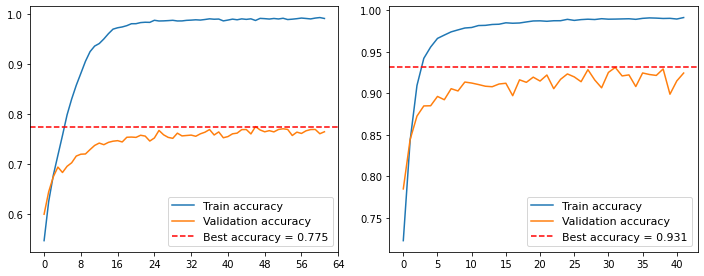

In [5]:
%pylab inline

def show_train_result(train_result=None, ax=None, title=None):
    df = pd.DataFrame({
        'train_loss': train_result['train.score']['loss'],
        'val_loss': train_result['val.score']['loss'],
        'train_accuracy': train_result['train.score']['accuracy'],
        'val_accuracy': train_result['val.score']['accuracy']
    })

    ax = df.loc[:, ['train_accuracy', 'val_accuracy']].plot(ax=ax, title=title)
    bs = train_result['best_score']
    n_epochs = train_result['stopped_epoch']
    ax.axhline(y=bs, ls='--', c='red')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.legend(["Train accuracy", "Validation accuracy", "Best accuracy = %0.3f" % bs], prop={"size": 11})
    
    print('##############################')
    print('n_epochs: %s' % train_result['n_epochs'])
    print('stopped_epoch: %s' % train_result['stopped_epoch'])
    print('best_epoch: %s' % train_result['best_epoch'])
    print('best_score: %s' % train_result['best_score'])
    print('best_chk: %s' % train_result['best_chk'])


fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(10)
fig.set_figheight(4)
plt.tight_layout(h_pad=2, w_pad=2)

show_train_result(train_result=experiment.get_train_result(0), 
                  ax=axes[0])
show_train_result(train_result=experiment.get_train_result(1), 
                  ax=axes[1])


## Loading final fine-tuned model

In [6]:
model = experiment.load_eval_model()
display(model)

# Eval result recoder
eval_recoder = PredResultRecoder(output_attentions=True, output_hidden_states=True)
model.add_pred_listener(eval_recoder)

2022-01-17 19:13:36 [INFO]: Create TAPE model using config: ../config/bert-base/
2022-01-17 19:13:38 [INFO]: Loading the eval model from ../output/exp2/train.1.model_31.chk


BertTCREpitopeModel(
  (bert): ProteinBertModel(
    (embeddings): ProteinBertEmbeddings(
      (word_embeddings): Embedding(30, 768, padding_idx=0)
      (position_embeddings): Embedding(8192, 768)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm()
      (dropout): Dropout(p=0.1)
    )
    (encoder): ProteinBertEncoder(
      (layer): ModuleList(
        (0): ProteinBertLayer(
          (attention): ProteinBertAttention(
            (self): ProteinBertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1)
            )
            (output): ProteinBertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm()
              (dropout): Dropout(p=0.1)
            )
     

## Model evaluations

### Shomuradova <i>et al.</i>

- Performance evaluation for the dataset containing COVID-19 S-protein<sub>266-277</sub>(YLQPRTFLL) epitope-specific CDR3βs from  Shomuradova <i>et al.</i>

#### Loading eval dataset

In [7]:
from torch.utils.data import DataLoader
from tcrbert.dataset import TCREpitopeSentenceDataset
import numpy as np
from tcrbert.dataset import CN
from tcrbert.bioseq import write_fa

epitope = 'YLQPRTFLL'

sh_ds = TCREpitopeSentenceDataset.from_key('shomuradova')
sh_df = sh_ds.df_enc

print(sh_ds.name)
display(sh_df.head(), sh_df.shape)
summary_df(sh_df)

2022-01-17 19:13:52 [INFO]: shomuradova dataset was loaded from ../output/shomuradova.data.csv, df.shape: (610, 9)
shomuradova


,epitope,epitope_gene,epitope_species,species,cdr3b,mhc,source,label,sentence
YLQPRTFLL_CASSFQNTGELFF,YLQPRTFLL,Spike,SARS-CoV-2,HomoSapiens,CASSFQNTGELFF,HLA-A*02,Shomuradova,1,"[2, 28, 15, 20, 19, 21, 23, 10, 15, 15, 7, 5, ..."
YLQPRTFLL_CASSSVNNNEQFF,YLQPRTFLL,Spike,SARS-CoV-2,HomoSapiens,CASSSVNNNEQFF,HLA-A*02,Shomuradova,1,"[2, 28, 15, 20, 19, 21, 23, 10, 15, 15, 7, 5, ..."
YLQPRTFLL_CAVGEANTGELFF,YLQPRTFLL,Spike,SARS-CoV-2,HomoSapiens,CAVGEANTGELFF,HLA-A*02,Shomuradova,1,"[2, 28, 15, 20, 19, 21, 23, 10, 15, 15, 7, 5, ..."
YLQPRTFLL_CAYQEVNTGELFF,YLQPRTFLL,Spike,SARS-CoV-2,HomoSapiens,CAYQEVNTGELFF,HLA-A*02,Shomuradova,1,"[2, 28, 15, 20, 19, 21, 23, 10, 15, 15, 7, 5, ..."
YLQPRTFLL_CSARDDQAVNTGELFF,YLQPRTFLL,Spike,SARS-CoV-2,HomoSapiens,CSARDDQAVNTGELFF,HLA-A*02,Shomuradova,1,"[2, 28, 15, 20, 19, 21, 23, 10, 15, 15, 7, 22,..."


(610, 9)

NameError: name 'summary_df' is not defined

#### Performance evaluation for Shomuradova dataset

2022-01-17 19:13:59 [DEBUG]: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Populating the interactive namespace from numpy and matplotlib
2022-01-17 19:13:59 [INFO]: ======================
2022-01-17 19:13:59 [INFO]: Begin predict...
2022-01-17 19:13:59 [INFO]: use_cuda, device: False, cpu
2022-01-17 19:13:59 [INFO]: n_data: 610
2022-01-17 19:13:59 [INFO]: batch_size: 610
2022-01-17 19:13:59 [INFO]: [PredResultRecoder]: on_predict_begin...
2022-01-17 19:14:00 [INFO]: Begin 0/1 prediction batch
2022-01-17 19:14:12 [INFO]: End 0/1 prediction batch
2022-01-17 19:14:12 [INFO]: [PredResultRecoder]: on_predict_end...
2022-01-17 19:14:13 [INFO]: Done to predict...
2022-01-17 19:14:13 [INFO]: ======================
score_map: OrderedDict([('accuracy', 0.9426229508196722), ('f1', 0.9427168576104746), ('roc_auc', 0.9674227358237033)])


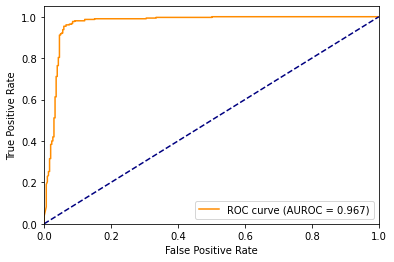

In [8]:
%pylab inline

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import numpy as np

metrics = ['accuracy', 'f1', 'roc_auc']

data_loader = DataLoader(sh_ds, batch_size=len(sh_ds), shuffle=False, num_workers=2)
model.predict(data_loader=data_loader, metrics=metrics)
print('score_map: %s' % eval_recoder.result_map['score_map'])

input_labels  = np.array(eval_recoder.result_map['input_labels'])
output_labels = np.array(eval_recoder.result_map['output_labels'])
output_probs  = np.array(eval_recoder.result_map['output_probs'])

fpr, tpr, _ = roc_curve(input_labels, output_probs)
score = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUROC = %0.3f)' % score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")



# Epitope-specific ROC curves
# epitopes = sh_df[CN.epitope].unique()

# fig, axes = plt.subplots(nrows=epitopes.shape[0], ncols=1)
# fig.set_figwidth(5)
# fig.set_figheight(4*len(epitopes))
# plt.tight_layout(h_pad=5, w_pad=3)

# for i, epitope in enumerate(epitopes):
#     indices = np.where(sh_df[CN.epitope] == epitope)[0]
# #     title = '%s-specific CDR3βs' % epitope
#     print(indices, len(indices))
#     title = None
#     ax = axes[i] if epitopes.shape[0] > 1 else axes
#     show_roc_curve(input_labels[indices], output_probs[indices], title=title, ax=ax)

#### Investigating position-wise attention weights 

##### Selecting target CDR3β sequences with most common lengths and predicted as a binder

2022-01-17 19:17:05 [DEBUG]: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Populating the interactive namespace from numpy and matplotlib
cum_ratio: 157/306=0.5130718954248366
target_indices for 13: [  0   1   2   3   7  11  13  18  19  20  21  22  23  24  25  27  28  32
  33  35  37  38  39  43  51  52  57  59  62  65  67  70  71  72  74  75
  76  78  79  81  82  88  89  90  91  92  93  94  97  99 100 110 111 113
 115 117 118 119 120 122 123 124 129 134 138 139 142 146 147 149 150 153
 154 155 156 158 160 161 162 168 169 170 172 173 174 175 176 177 178 179
 180 185 186 188 189 190 192 193 194 197 198 201 202 203 205 207 211 213
 214 217 219 220 223 225 228 231 232 233 234 235 237 238 239 240 243 244
 245 247 250 251 252 256 260 261 263 266 267 268 270 271 273 275 277 279
 280 287 289 290 291 292 294 295 296 298 299 341 533](157)
cum_ratio: 223/306=0.7287581699346405
target_indices for 16: [  4  16  29  40  41  42  44  53  56  60  61  63  68  83  96 103 105 10

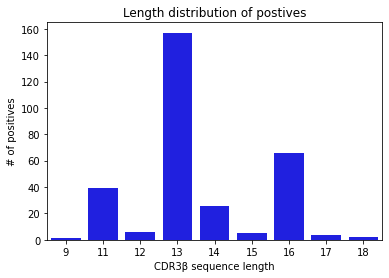

In [10]:
%pylab inline

import matplotlib.pyplot as plt
import matplotlib.image as image

import seaborn as sns
from collections import Counter, OrderedDict

pos_indices = np.where(output_labels == 1)[0]
# print('pos_indices: %s(%s)' % (pos_indices, str(pos_indices.shape)))
pos_cdr3b = sh_df[CN.cdr3b].values[pos_indices]

##########################################
lens, cnts = zip(*sorted(Counter(map(lambda x: len(x), pos_cdr3b)).items()))
lens = np.array(lens)
cnts = np.array(cnts)
ax = sns.barplot(x=lens, y=cnts, color='blue')
ax.set_title('Length distribution of postives')
ax.set_xlabel('CDR3β sequence length')
ax.set_ylabel('# of positives')

# Select target indices by cdr3b sequence lenghts
target_index_map = OrderedDict()
order = np.argsort(cnts)[::-1]
cum_cnt = 0
for cur_len, cur_cnt in zip(lens[order], cnts[order]):
    cum_cnt += cur_cnt
    cum_ratio = cum_cnt/pos_indices.shape[0]
    print('cum_ratio: %s/%s=%s' % (cum_cnt, pos_indices.shape[0], cum_ratio))
    if cum_ratio < 0.9:
        target_indices = np.where((output_labels == 1) & (sh_df[CN.cdr3b].map(lambda x: len(x) == cur_len)))[0]
        print('target_indices for %s: %s(%s)' % (cur_len, target_indices, target_indices.shape[0]))
        target_index_map[cur_len] = target_indices



##### Marginalized position-wise attention weights for target YLQPRTFLL-CDR3b sequences 

- The output attention weights have the dimension $(L, N, H, S, S)$, where $L$ is the number of encoding layers, $N$ is the number of YLQPRTFLL-CDR3β sequence pairs, $H$ is the number of attention heads, and $S$ is the fixed-length of the sequences. The attention weights were marginalized into a one-dimensional vector of length of $S$. A value of the vector at the position $m$, $Am$ is given by the following equation:

<img src='res/eq1.png' width='50%'>

2022-01-17 19:17:11 [DEBUG]: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Populating the interactive namespace from numpy and matplotlib
attentions.shape: (12, 610, 12, 40, 40)
Attention weights for 13: [0.01857969 0.01608891 0.01522762 0.02285156 0.01858175 0.01607358
 0.01993643 0.01840888 0.01978891 0.02223462 0.01997541 0.03262524
 0.0320103  0.03778747 0.04262293 0.05515851 0.03633889 0.0483207
 0.02764955 0.0266127  0.02590605 0.03014962]
Attention weights for 16: [0.01668394 0.01544639 0.01556776 0.0215202  0.01998964 0.01596806
 0.01910153 0.01814754 0.01929475 0.02076946 0.01722507 0.02359793
 0.03035075 0.04555447 0.04556603 0.03579038 0.03457143 0.05084242
 0.04540806 0.02894336 0.03042705 0.02411234 0.02291851 0.02369691
 0.02745543]
Attention weights for 11: [0.01744298 0.01738786 0.01578622 0.02205473 0.01861345 0.01549458
 0.02331311 0.01942356 0.01961776 0.02062225 0.01925286 0.02269144
 0.02741531 0.06748258 0.04008263 0.0343192  0.03731755 0

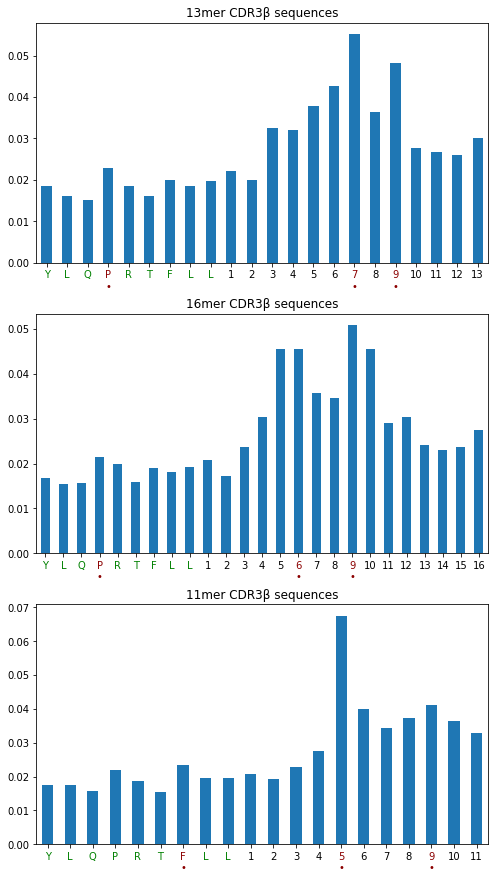

In [11]:
%pylab inline

# n_layers = model.config.num_hidden_layers
# n_data = len(eval_ds)
# n_heads = model.config.num_attention_heads
# max_len = eval_ds.max_len

epitope_len = len(epitope)

attentions = eval_recoder.result_map['attentions']
# attentions.shape: (n_layers, n_data, n_heads, max_len, max_len)
print('attentions.shape: %s' % str(attentions.shape))

# target_attn_map = OrderedDict()

fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figwidth(7)
fig.set_figheight(12)
plt.tight_layout(h_pad=3, w_pad=3)

for i, (cur_len, cur_indices) in enumerate(target_index_map.items()):
    attns = attentions[:, cur_indices]
    sent_len = epitope_len + cur_len
    
    # Position-wise marginal attentions by mean
    attns = np.mean(attns, axis=(0, 1, 2, 3))[1:sent_len+1]
    print('Attention weights for %s: %s' % (cur_len, attns))
    
    ax = pd.Series(attns).plot(kind='bar', ax=axes[i], rot=0)
    ax.set_title('%smer CDR3β sequences' % cur_len)

    ticks = list(epitope) + list(range(1, cur_len + 1))
    mark_ratio = 0.1
    mark_pos = []

    for rank, pos in enumerate(np.argsort(attns[:epitope_len])[::-1]):
        if rank < (epitope_len*mark_ratio):
            ticks[pos] = '%s\n•' % (ticks[pos])
            mark_pos.append(pos)

    for rank, pos in enumerate(np.argsort(attns[epitope_len:])[::-1]):
        if rank < (cur_len*mark_ratio):
            ticks[epitope_len+pos] = '%s\n•' % (ticks[epitope_len+pos])
            mark_pos.append(epitope_len+pos)

    ax.set_xticklabels(ticks) 
    for i, tick in enumerate(ax.get_xticklabels()):
        if i < epitope_len:
            tick.set_color('green')
        else:
            tick.set_color('black')
        if i in mark_pos:
            tick.set_color('darkred')

### ImmuneCODE dataset

-  The dataset contained 718 COVID-19 S-protein<sub>269-277</sub>-specific TCRs from the ImmuneRACE study launched by Adaptive Biotechnologies and Microsoft (https://immunerace.adaptivebiotech.com, June 10, 2020 dataset, from hereafter referred to as ImmuneCODE dataset

#### Loading eval dataset

In [12]:
im_ds = TCREpitopeSentenceDataset.from_key('immunecode')
display(im_ds.name, len(im_ds))

# Remove duplicated CDR3beta seqs with Shomuradova
im_ds.df_enc = im_ds.df_enc[
        im_ds.df_enc[CN.cdr3b].map(lambda seq: seq not in sh_df[CN.cdr3b].values)
]
im_df = im_ds.df_enc
print('After removing duplicates, len(im_ds): %s' % len(im_ds))
display(im_df.head(), im_df.shape)

2022-01-17 19:17:27 [INFO]: immunecode dataset was loaded from ../output/immunecode.data.csv, df.shape: (742, 9)


'immunecode'

742

After removing duplicates, len(im_ds): 718


,epitope,epitope_gene,epitope_species,species,cdr3b,mhc,source,label,sentence
YLQPRTFLL_CAKGLANTGELFF,YLQPRTFLL,Spike,SARS-CoV-2,human,CAKGLANTGELFF,NaN,ImmuneCODE,1,"[2, 28, 15, 20, 19, 21, 23, 10, 15, 15, 7, 5, ..."
YLQPRTFLL_RKQWQGEETQYF,YLQPRTFLL,Spike,SARS-CoV-2,human,RKQWQGEETQYF,NaN,ImmuneCODE,1,"[2, 28, 15, 20, 19, 21, 23, 10, 15, 15, 21, 14..."
YLQPRTFLL_CASSYRNTGELFF,YLQPRTFLL,Spike,SARS-CoV-2,human,CASSYRNTGELFF,NaN,ImmuneCODE,1,"[2, 28, 15, 20, 19, 21, 23, 10, 15, 15, 7, 5, ..."
YLQPRTFLL_CSARDNWAVNTGELFF,YLQPRTFLL,Spike,SARS-CoV-2,human,CSARDNWAVNTGELFF,NaN,ImmuneCODE,1,"[2, 28, 15, 20, 19, 21, 23, 10, 15, 15, 7, 22,..."
YLQPRTFLL_CSAREREGQGANTGELFF,YLQPRTFLL,Spike,SARS-CoV-2,human,CSAREREGQGANTGELFF,NaN,ImmuneCODE,1,"[2, 28, 15, 20, 19, 21, 23, 10, 15, 15, 7, 22,..."


(718, 9)

#### Performance evaluation for the ImmuneCODE dataset

2022-01-17 19:17:31 [DEBUG]: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Populating the interactive namespace from numpy and matplotlib
2022-01-17 19:17:31 [INFO]: ======================
2022-01-17 19:17:31 [INFO]: Begin predict...
2022-01-17 19:17:31 [INFO]: use_cuda, device: False, cpu
2022-01-17 19:17:31 [INFO]: n_data: 718
2022-01-17 19:17:31 [INFO]: batch_size: 718
2022-01-17 19:17:31 [INFO]: [PredResultRecoder]: on_predict_begin...
2022-01-17 19:17:31 [INFO]: Begin 0/1 prediction batch
2022-01-17 19:17:42 [INFO]: End 0/1 prediction batch
2022-01-17 19:17:42 [INFO]: [PredResultRecoder]: on_predict_end...
2022-01-17 19:17:43 [INFO]: Done to predict...
2022-01-17 19:17:43 [INFO]: ======================
score_map: OrderedDict([('accuracy', 0.9554317548746518), ('f1', 0.9513677811550151), ('roc_auc', 0.9824616948092557)])


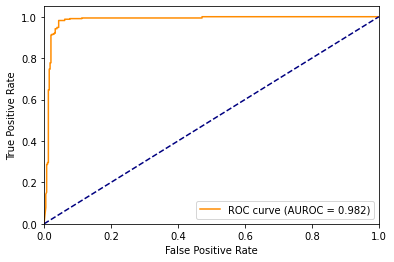

In [13]:
%pylab inline

from sklearn.metrics import roc_curve, auc

data_loader = DataLoader(im_ds, batch_size=len(im_ds), shuffle=False, num_workers=2)
model.predict(data_loader=data_loader, metrics=metrics)

input_labels  = np.array(eval_recoder.result_map['input_labels'])
output_labels = np.array(eval_recoder.result_map['output_labels'])
output_probs  = np.array(eval_recoder.result_map['output_probs'])

fpr, tpr, _ = roc_curve(input_labels, output_probs)
score = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUROC = %0.3f)' % score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

print('score_map: %s' % eval_recoder.result_map['score_map'])

#### Investigating position-wise attention weights

##### Selecting target CDR3β sequences with most common lengths and predicted as a binder

2022-01-17 19:17:50 [DEBUG]: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Populating the interactive namespace from numpy and matplotlib
cum_ratio: 160/330=0.48484848484848486
target_indices for 13: [  0   2   5   9  10  11  16  17  21  23  26  27  28  30  32  33  36  40
  41  42  43  44  45  46  47  48  51  55  56  60  65  68  69  71  72  74
  75  77  81  84  85  86  87  90  93  94 100 105 106 107 109 110 111 113
 114 115 118 126 127 129 131 133 135 138 140 145 147 148 151 154 156 157
 163 166 167 168 170 172 174 175 176 177 181 183 184 188 190 191 192 194
 196 199 200 201 202 203 204 207 208 209 210 211 216 219 220 222 223 224
 226 230 231 233 234 235 239 240 254 255 256 258 259 260 261 263 264 265
 269 280 281 282 283 286 289 290 292 293 295 297 298 299 304 306 308 310
 312 314 317 318 319 320 321 323 324 325 326 327 406 500 548 648](160)
cum_ratio: 217/330=0.6575757575757576
target_indices for 14: [  7  22  29  37  39  49  52  53  54  78  83  88 101 102 1

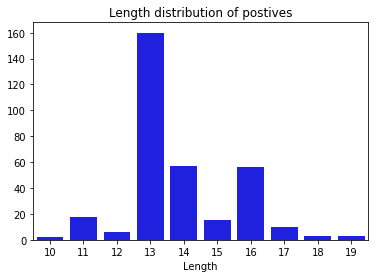

In [14]:
%pylab inline

import matplotlib.pyplot as plt
import matplotlib.image as image

import seaborn as sns
from collections import Counter, OrderedDict

pos_indices = np.where(output_labels == 1)[0]
# print('pos_indices: %s(%s)' % (pos_indices, str(pos_indices.shape)))
pos_cdr3b = im_df[CN.cdr3b].values[pos_indices]

##########################################
lens, cnts = zip(*sorted(Counter(map(lambda x: len(x), pos_cdr3b)).items()))
lens = np.array(lens)
cnts = np.array(cnts)
ax = sns.barplot(x=lens, y=cnts, color='blue')
ax.set_title('Length distribution of postives')
ax.set_xlabel('Length')

# Select target indices by cdr3b sequence lenghts
target_index_map = OrderedDict()
order = np.argsort(cnts)[::-1]
cum_cnt = 0
for cur_len, cur_cnt in zip(lens[order], cnts[order]):
    cum_cnt += cur_cnt
    cum_ratio = cum_cnt/pos_indices.shape[0]
    print('cum_ratio: %s/%s=%s' % (cum_cnt, pos_indices.shape[0], cum_ratio))
    if cum_ratio < 0.85:
        target_indices = np.where((output_labels == 1) & (im_df[CN.cdr3b].map(lambda x: len(x) == cur_len)))[0]
        print('target_indices for %s: %s(%s)' % (cur_len, target_indices, target_indices.shape[0]))
        target_index_map[cur_len] = target_indices


##### Marginalized position-wise attention weights for target YLQPRTFLL-CDR3b sequences 

2022-01-17 19:18:04 [DEBUG]: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Populating the interactive namespace from numpy and matplotlib
attentions.shape: (12, 718, 12, 40, 40)
Current attns for 13: [0.01609692 0.01436776 0.01488411 0.01865865 0.01734455 0.01548417
 0.01684564 0.01673322 0.0185993  0.02003878 0.02078352 0.03398889
 0.03523092 0.03877414 0.04921979 0.06128518 0.04138045 0.05139939
 0.02828386 0.02826191 0.02514153 0.02958469]
Current attns for 14: [0.01450143 0.01437897 0.01488407 0.01868124 0.01796681 0.01544771
 0.01690106 0.01672353 0.01860502 0.01816808 0.02176429 0.03026599
 0.03929647 0.04900951 0.0498584  0.04653533 0.05862032 0.03780203
 0.04023939 0.02593344 0.02519988 0.02555866 0.02683307]
Current attns for 16: [0.01378501 0.01367887 0.01553274 0.01802229 0.0185974  0.01591694
 0.01604366 0.01628189 0.01784639 0.01817388 0.01758859 0.02384215
 0.03162965 0.05057425 0.04514423 0.04008093 0.03969992 0.05278721
 0.05383489 0.03045659 0

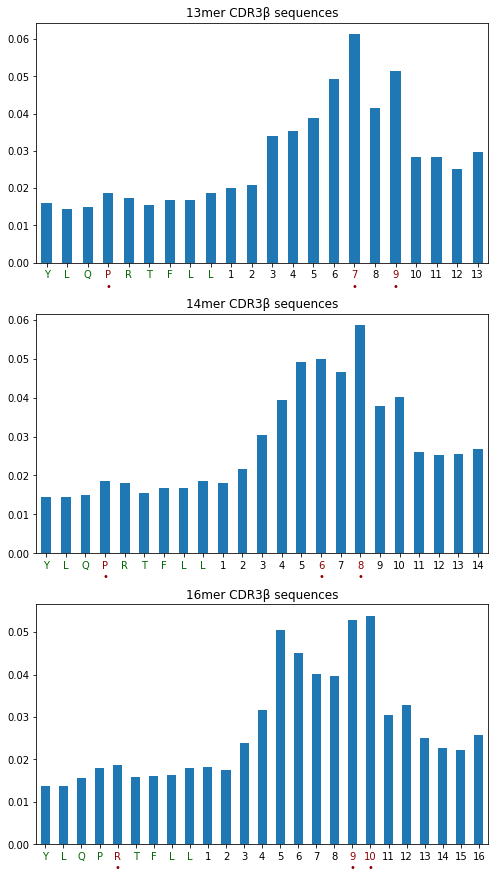

In [15]:
%pylab inline

# n_layers = model.config.num_hidden_layers
# n_data = len(eval_ds)
# n_heads = model.config.num_attention_heads
# max_len = eval_ds.max_len

epitope_len = len(epitope)

attentions = eval_recoder.result_map['attentions']
# attentions.shape: (n_layers, n_data, n_heads, max_len, max_len)
print('attentions.shape: %s' % str(attentions.shape))

# target_attn_map = OrderedDict()

fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figwidth(7)
fig.set_figheight(12)
plt.tight_layout(h_pad=3, w_pad=3)

for i, (cur_len, cur_indices) in enumerate(target_index_map.items()):
    attns = attentions[:, cur_indices]
    sent_len = epitope_len + cur_len
    
    # Position-wise marginal attentions by mean
    attns = np.mean(attns[-10:], axis=(0, 1, 2, 3))[1:sent_len+1]
    print('Current attns for %s: %s' % (cur_len, attns))
    
    ax = pd.Series(attns).plot(kind='bar', ax=axes[i], rot=0)
    ax.set_title('%smer CDR3β sequences' % cur_len)

    ticks = list(epitope) + list(range(1, cur_len + 1))
    mark_ratio = 0.1
    mark_pos = []

    for rank, pos in enumerate(np.argsort(attns[:epitope_len])[::-1]):
        if rank < (epitope_len*mark_ratio):
            ticks[pos] = '%s\n•' % (ticks[pos])
            mark_pos.append(pos)

    for rank, pos in enumerate(np.argsort(attns[epitope_len:])[::-1]):
        if rank < (cur_len*mark_ratio):
            ticks[epitope_len+pos] = '%s\n•' % (ticks[epitope_len+pos])
            mark_pos.append(epitope_len+pos)

    ax.set_xticklabels(ticks) 
    for i, tick in enumerate(ax.get_xticklabels()):
        if i < epitope_len:
            tick.set_color('darkgreen')
        else:
            tick.set_color('black')
        if i in mark_pos:
            tick.set_color('darkred')
    

### Performance evaluation for the dataset from Lu, T. et al

- Performance evaluation for independent test dataset from the recent pMHC-TCR interaction study[Lu, T. et al, 2021]
- The dataset contains 619 pMHC-TCR sequence pairs compiled from VDJdb
- The same number of negative examples were added
- Lu, T., Zhang, Z., Zhu, J. et al. Deep learning-based prediction of the T cell receptor–antigen binding specificity. Nat Mach Intell 3, 864–875 (2021). https://doi.org/10.1038/s42256-021-00383-2


In [17]:

pm_ds = TCREpitopeSentenceDataset.from_key('pTMnet')
display(pm_ds.name, len(pm_ds))

pm_df = pm_ds.df_enc
display(pm_df.head(), pm_df.shape)

2022-01-17 19:19:32 [INFO]: pTMnet dataset was loaded from ../output/pTMnet.data.csv, df.shape: (1198, 10)


'pTMnet'

1198

,epitope,epitope_gene,epitope_species,species,cdr3b,mhc,source,ref_id,label,sentence
SMLGIGIYPV_CASSLSFGTEAFF,SMLGIGIYPV,NaN,NaN,NaN,CASSLSFGTEAFF,A*02:01,pTMnet,lu2021deep,1,"[2, 22, 16, 15, 11, 13, 11, 13, 28, 19, 25, 7,..."
LMFDRGMSLL_CASSLSFGTEAFF,LMFDRGMSLL,NaN,NaN,NaN,CASSLSFGTEAFF,A*02:01,pTMnet,lu2021deep,1,"[2, 15, 16, 10, 8, 21, 11, 16, 22, 15, 15, 7, ..."
ILEDRGFNQV_CASSLSFGTEAFF,ILEDRGFNQV,NaN,NaN,NaN,CASSLSFGTEAFF,A*02:01,pTMnet,lu2021deep,1,"[2, 13, 15, 9, 8, 21, 11, 10, 17, 20, 25, 7, 5..."
MMWDRGLGMM_CASSLSFGTEAFF,MMWDRGLGMM,NaN,NaN,NaN,CASSLSFGTEAFF,A*02:01,pTMnet,lu2021deep,1,"[2, 16, 16, 26, 8, 21, 11, 15, 11, 16, 16, 7, ..."
NLSNLGILPV_CASSLSFGTEAFF,NLSNLGILPV,NaN,NaN,NaN,CASSLSFGTEAFF,A*02:01,pTMnet,lu2021deep,1,"[2, 17, 15, 22, 17, 15, 11, 13, 15, 19, 25, 7,..."


(1198, 10)

2022-01-17 19:19:34 [DEBUG]: Loaded backend module://ipykernel.pylab.backend_inline version unknown.
Populating the interactive namespace from numpy and matplotlib
2022-01-17 19:19:34 [INFO]: ======================
2022-01-17 19:19:34 [INFO]: Begin predict...
2022-01-17 19:19:34 [INFO]: use_cuda, device: False, cpu
2022-01-17 19:19:34 [INFO]: n_data: 1198
2022-01-17 19:19:34 [INFO]: batch_size: 1198
2022-01-17 19:19:34 [INFO]: [PredResultRecoder]: on_predict_begin...
2022-01-17 19:19:35 [INFO]: Begin 0/1 prediction batch
2022-01-17 19:19:54 [INFO]: End 0/1 prediction batch
2022-01-17 19:19:55 [INFO]: [PredResultRecoder]: on_predict_end...
2022-01-17 19:19:57 [INFO]: Done to predict...
2022-01-17 19:19:57 [INFO]: ======================
score_map: OrderedDict([('accuracy', 0.9649415692821369), ('f1', 0.964824120603015), ('roc_auc', 0.985157510709279)])


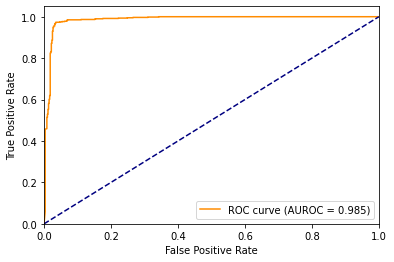

In [18]:
%pylab inline

from sklearn.metrics import roc_curve, auc

data_loader = DataLoader(pm_ds, batch_size=len(pm_ds), shuffle=False, num_workers=2)
model.predict(data_loader=data_loader, metrics=metrics)

input_labels  = np.array(eval_recoder.result_map['input_labels'])
output_labels = np.array(eval_recoder.result_map['output_labels'])
output_probs  = np.array(eval_recoder.result_map['output_probs'])

fpr, tpr, _ = roc_curve(input_labels, output_probs)
score = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUROC = %0.3f)' % score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
print('score_map: %s' % eval_recoder.result_map['score_map'])
